# Ensemble Methods
## Bagging: 
### Data set used: penguins using seaborn
### Target value y = predict sex of the penguin for Gentoo penguin species

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins = penguins.iloc[214:-1]#restricting the data only for Gentoo species of penguins
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


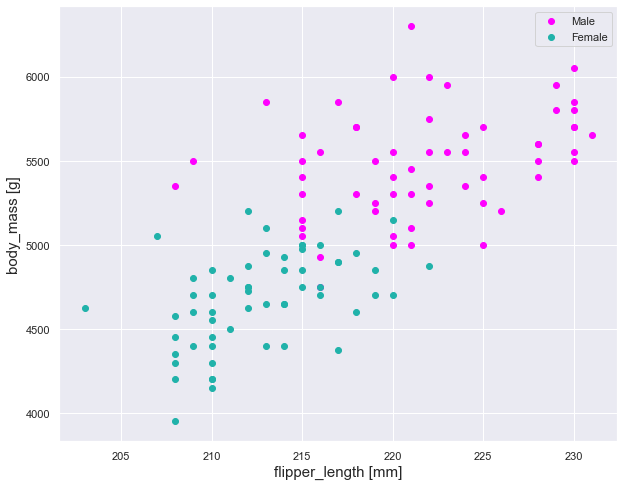

In [16]:
X = penguins[["flipper_length_mm", "body_mass_g"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Male":
        return 0
    else:
        return 1
    
        
# Create target value array
y = penguins["sex"].map(make_labels).to_numpy()

# Plot the data
sex = ["Male", "Female"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(sex, colors):
    temp_df = penguins[penguins.sex == species]
    ax.scatter(temp_df.flipper_length_mm,
               temp_df.body_mass_g,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("flipper_length [mm]", fontsize = 15)
ax.set_ylabel("body_mass [g]", fontsize = 15)
ax.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.95      0.78      0.86        27

    accuracy                           0.85        48
   macro avg       0.86      0.87      0.85        48
weighted avg       0.87      0.85      0.85        48
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.89      0.89      0.89        27

    accuracy                           0.88        48
   macro avg       0.87      0.87      0.87        48
weighted avg       0.88      0.88      0.88        48
 



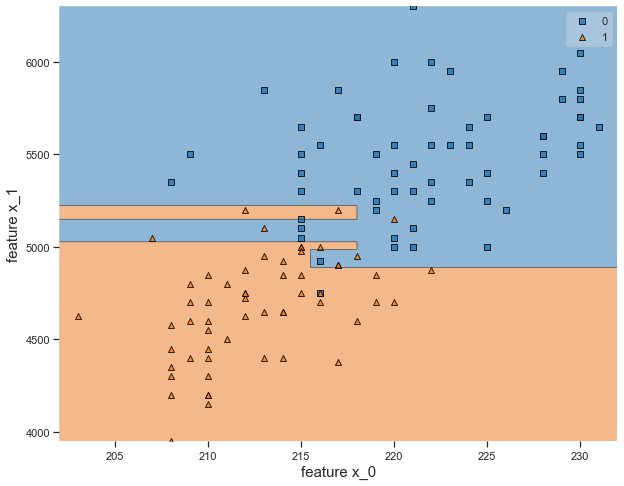

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

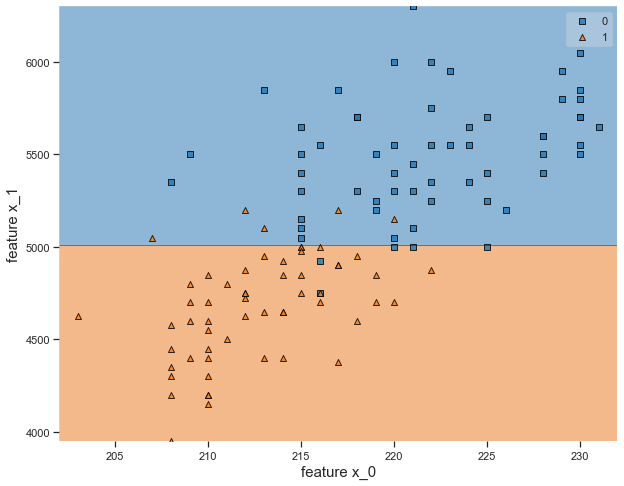

In [19]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

## Random Forest Classifier on the same data set and data parameters

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.95      0.78      0.86        27

    accuracy                           0.85        48
   macro avg       0.86      0.87      0.85        48
weighted avg       0.87      0.85      0.85        48
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.89      0.89      0.89        27

    accuracy                           0.88        48
   macro avg       0.87      0.87      0.87        48
weighted avg       0.88      0.88      0.88        48
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.89      0.89      0.89        27

    accuracy                           0.88        48
   macro avg       0.87      0.87     

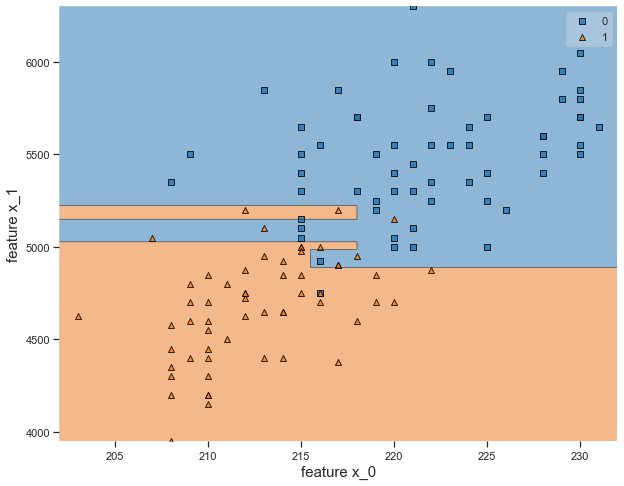

In [21]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

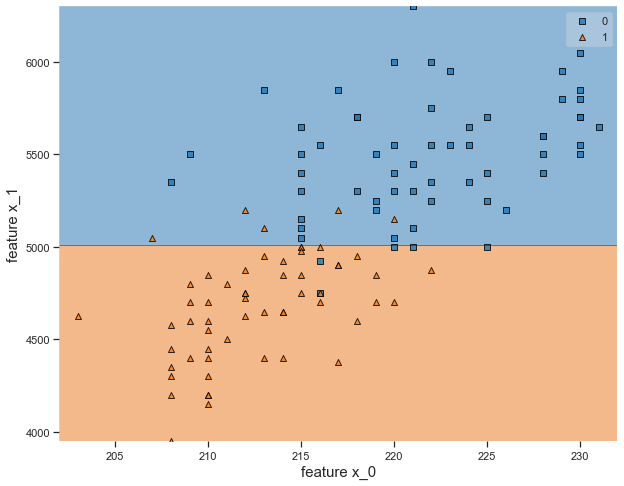

In [22]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

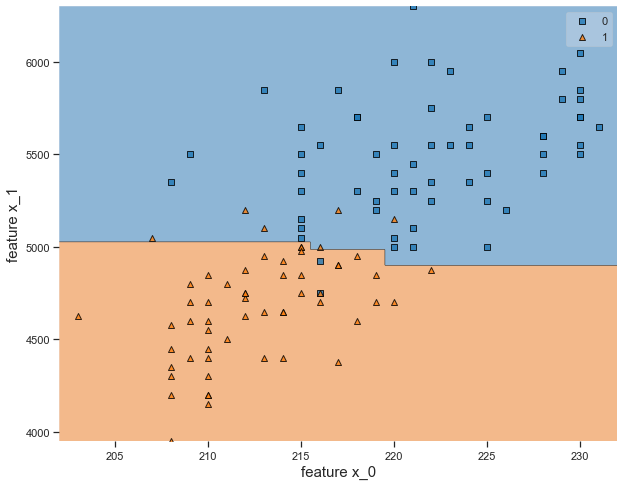

In [23]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 100,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.93      1.00      0.96        26

    accuracy                           0.96        48
   macro avg       0.96      0.95      0.96        48
weighted avg       0.96      0.96      0.96        48
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.87      1.00      0.93        26

    accuracy                           0.92        48
   macro avg       0.93      0.91      0.91        48
weighted avg       0.93      0.92      0.92        48
 

Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.87      1.00      0.93        26

    accuracy                           0.92        48
   macro avg       0.93      0.91     

## Correlation Scores for the data parameters

In [25]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.25
bill_depth_mm 0.28
flipper_length_mm 0.09
body_mass_g 0.38


## From the above scores body mass of the penguin has the most weight in terms of determining the target value .i.e sex of the Gentoo penguins

# Ensemble Method Adaboost

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = penguins[["flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.96      0.85      0.90        27

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48
 



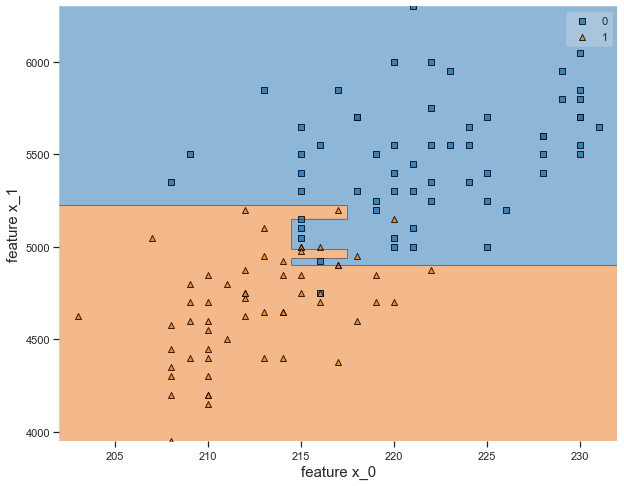

In [27]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [28]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.96      0.96      0.96        27

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48
 

